In [1]:
import numpy as np
import pandas as os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC,LinearSVC
import matplotlib.pyplot as plt
import os
import copy

In [2]:
import sys
dir_path = os.path.join(os.getcwd(), '../', 'scripts/')
sys.path.insert(1, dir_path)
from features import get_features

In [16]:
features = ['z_rms', 'Velocity']

In [ ]:
index = 0
training_df = get_features(index, training=True, resample=True, features=copy.deepcopy(features))
print(training_df.head())

In [12]:
def plot_actual_vs_predicted(Y_actual, Y_pred):
    x = np.linspace(0, len(Y_actual), len(Y_actual))
    plt.figure(figsize=(12,5))
    plt.plot(x, Y_actual, color='g', label='actual')
    plt.plot(x, Y_pred, color='r', label='predicted')
    plt.title('ACTUAL VS PREDICTED LABELS')
    plt.grid()
    plt.legend()
    plt.show()

In [13]:
X = training_df[features]
Y = training_df['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

######## creating a random forest classifier ########
rndm_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rndm_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
Y_pred = rndm_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'models accuracy on test data is: {accuracy}')

Y_pred_comp = rndm_clf.predict(X)
accuracy = accuracy_score(Y, Y_pred_comp)
print(f'models accuracy on complete data is: {accuracy}')

models accuracy on test data is: 0.6238805970149254
models accuracy on complete data is: 0.6905829596412556


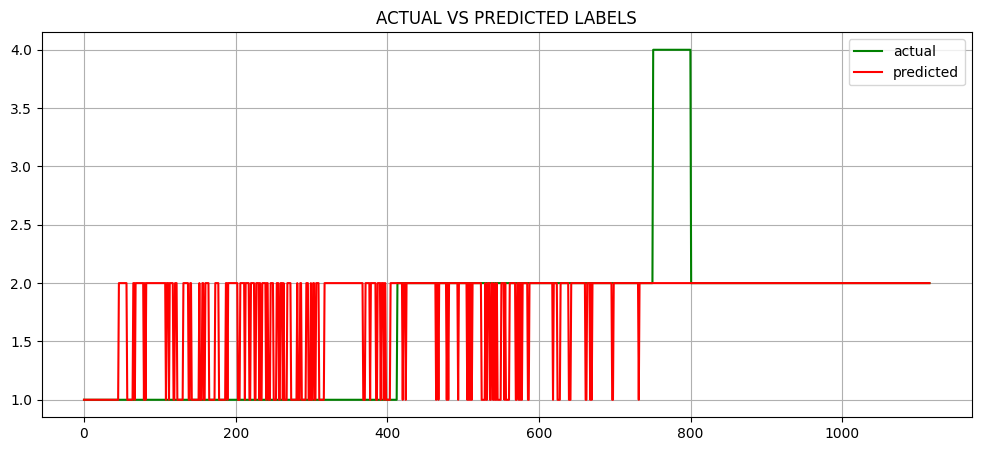

In [15]:
plot_actual_vs_predicted(Y, Y_pred_comp)

In [9]:
#save rndm_clf as a pickle file